In [1]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from pathlib import Path
from cocoviz import ProblemDescription, Result, ResultSet, Indicator, rtpplot

DATA_DIR = Path("data/")

## Read in the data

In [2]:
ALGORITHMS = ["NSGA-II", "GDE3"]
FUNCTIONS = [f"LZ09_F{i}" for i in range(1, 4)]
VARS = [10, 30]
RUN = [1, 2, 3]
ALL_RESULTS = list(itertools.product(ALGORITHMS, FUNCTIONS, VARS, RUN))

In [3]:
results = ResultSet()
for alg, fn, var, run in tqdm(ALL_RESULTS):
    LOCAL = Path(f"data/{alg}_{fn}_vars={var}_run={run}.parquet")
    data = pd.read_csv(Path(f"data/{alg}_{fn}_vars={var}_run={run}.csv"))
    data = data[data["Evaluations"] <= 10000]
    # Add artificial performance indicator that must be minimized
    # data["neg_hv"] = -data["Hypervolume"]
    problem = ProblemDescription(fn, 1, var, 3)
    result = Result(alg, problem, data, "Evaluations")
    results.append(result)

  0%|          | 0/36 [00:00<?, ?it/s]

## Set the number of targets and the indicator

In [4]:
number_of_targets = 1001
INDICATOR = Indicator("Hypervolume", larger_is_better=True)

## Plot the results by aggregating over all problems

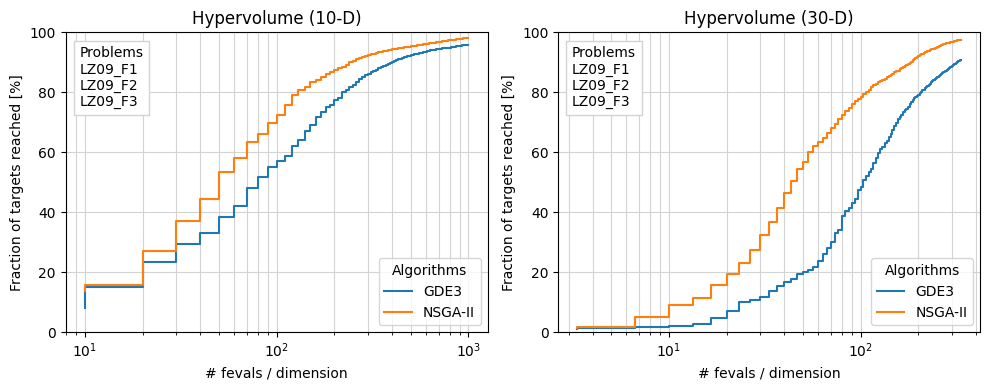

In [5]:
fig, axes = plt.subplots(1, len(VARS), figsize=(10, 4))
for ax, (d, result_subset) in zip(axes, results.by_number_of_variables()):
    rtpplot(result_subset, INDICATOR, number_of_targets=number_of_targets, ax=ax)
    ax.set_title(f"Hypervolume ({d}-D)")
plt.tight_layout()
plt.savefig("profiles-aggregated.pdf", bbox_inches="tight")

## Plot the results for each problem separately

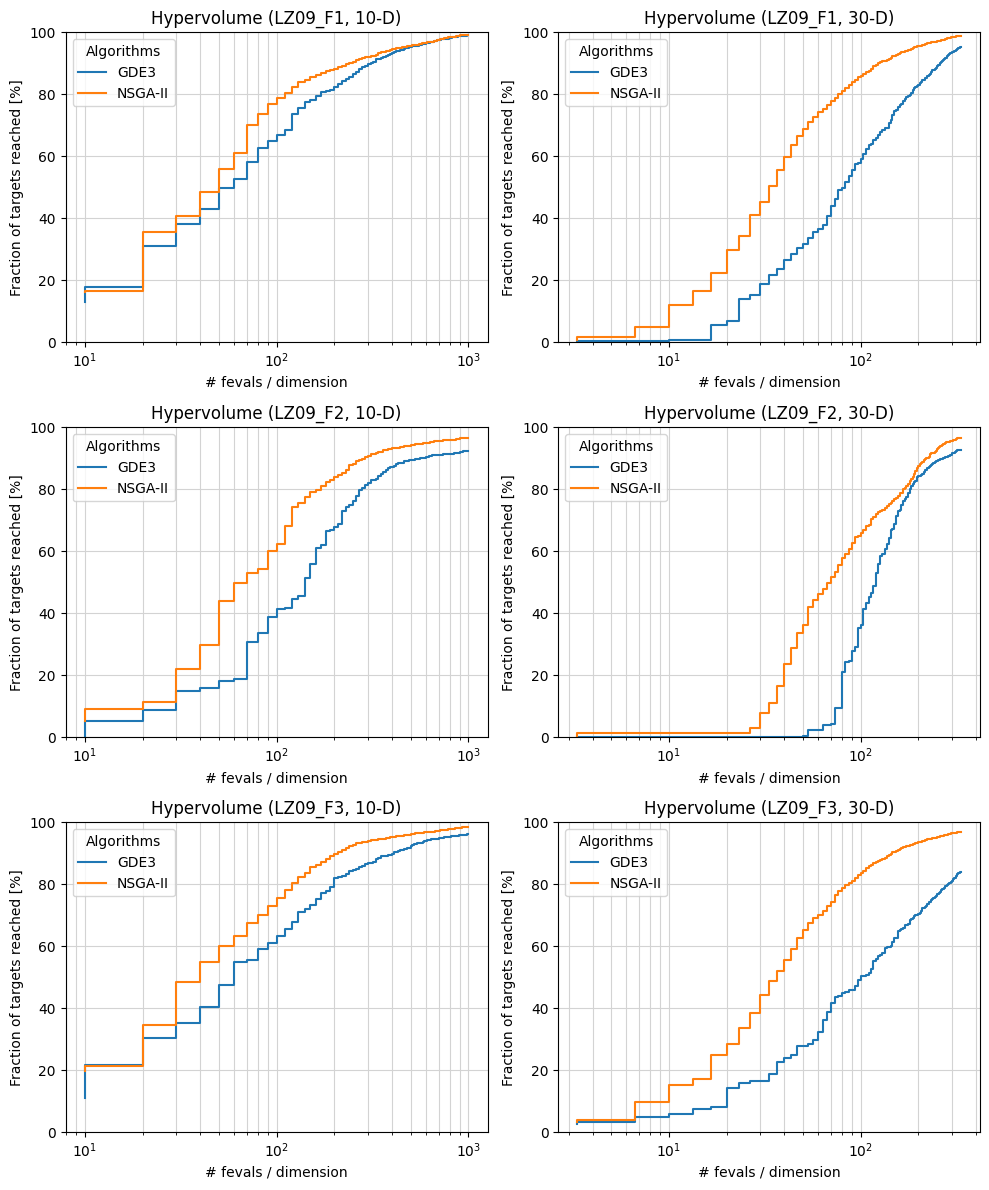

In [6]:
fig, axes = plt.subplots(len(FUNCTIONS), len(VARS), figsize=(10, 12))
for ax, (r, result_subset) in zip(axes.flatten(), results.by_problem()):
    rtpplot(result_subset, INDICATOR, number_of_targets=number_of_targets, ax=ax)
    ax.set_title(f"Hypervolume ({r.name}, {r.number_of_variables}-D)")
plt.tight_layout()
plt.savefig("profiles-per-problem.pdf", bbox_inches="tight")